
# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass am Grund des Sees habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

**1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?** _(Hinweis: Der Auslassquerschnitt ist im Verhältnis zur Oberfläche so gering, dass der Kegel als spitz angenommen werden kann.)_

In [16]:
# V=1/3*G*h
G=10*10**6
V0=215*10**6
h0=3*V0/G
print("Der See hat eine Tiefe von ",h0," m.")

Der See hat eine Tiefe von  64.5  m.


Vereinfachend werde angenommen, dass die sich ausbildende Strömung mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschrieben werden kann:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei ist 

|||
|-|-|
|$u$ | Strömungsgeschwindigkeit des Fluids |
|$p$ | hydrodynamischer Druck| 
|$\rho$| Dichte des Fluids |
|$z$ | Höhe über einem Referenzpunkt|
|$g=9{,}81\frac{\text{m}}{\text{s}^2}$ | Erdbeschleunigung| 

Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$
Der Referenzpunkt für die $z$-Werte kann beliebig gewählt werden. Die Tiefe des Sees ist definiert als Differenz der Höhe der Oberfläche und der Höhe des Ausflusses.

**2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ sowie den Volumenstrom $\dot{V_0}$ unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [17]:
uoben=0 #Annahme
zunten=0
zoben=h0
g=9.81
A=2
uunten=(2*(uoben**2/2+g*zoben-g*zunten))**0.5
V0punkt=uunten*A
uunten, V0punkt

(35.57372625969902, 71.14745251939804)

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [18]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (G/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


**3) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees allgemein abhängig von der enthaltenen Wassermenge bestimmt.** _(Hinweis: Beachten Sie, dass sich die Form des Sees [nicht verändert](https://de.wikipedia.org/wiki/Strahlensatz) und somit der oben gegebene Wert für die Oberfläche nur bei vollem See gilt.)_

In [28]:
import math 
def tiefe(V):
    alpha=math.atan(h0/r0)
    # G=r**2*pi
    # r=h/tan(alpha)
    # h=3*V/G=3*V/(r**2*pi)=3*V/((h/tan(alpha))**2*pi)
    return (3*V*math.tan(alpha)**2/pi)**(1/3)

**4) Schreiben Sie eine Funktion, die ausgehend von einem Startvolumen $V_0$ und einer gegebenen Zeitschrittweite $\Delta t$ den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt. Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.** *(Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.)*

In [22]:
def volumenstrom (V):
    return (2*g*tiefe(V))**0.5*A*3600

def abfluss(V0, dt):
    #V_list=[V0]
    #while V0-volumenstrom(V0)*dt>0:
    #    V0=V0-volumenstrom(V0)*dt
    #    V_list+=[V0]
    V_list=[]
    V_list+=[0]
    h_list=[tiefe(V) for V in V_list]
    t_list=[i*dt for i in range(0,len(h_list)-1)]
    t_list+=[t_list[-1]+ (V_list[-2])/volumenstrom(V_list[-2])] #tn=tn-1+dt=tn-1+Vn-Vn+1/Vnpunkt
    

    return t_list, h_list 

**5) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?**
  * Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
    * $\Delta t_1$ = 1 Minute
    * $\Delta t_2$ = 4 Tage
  * Zeichnen Sie beide Verläufe in _ein_ Diagramm und diskutieren Sie Auffälligkeiten.

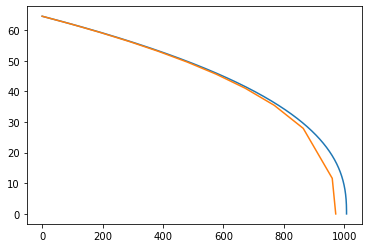

1007.2771232660616
971.5343184585208


In [31]:
%matplotlib inline
from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)
x=abfluss(V0,1/60)
y=abfluss(V0,96)
plot(x[0],x[1])
plot(y[0],y[1])
show()
print(x[0][-1])
print(y[0][-1])

**6) Wiederholen Sie Aufgabenteil 5) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.**

*Hinweis: Die Form des Sees sollte nur in der Funktion `tiefe` vorkommen, d.h. Sie müssen nur diese ändern / neu definieren.*

In [26]:
def tiefe (V):
    #V=G*h
    return V/G

